# Методы анализа сложных сетей 

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Библиотека по работе с сетями:

In [71]:
import networkx as nx 

Давайте создадим наш первый граф с помощью функций данной библиотеки

In [72]:
G=nx.Graph() # empty graph
#G = nx.DiGraph() # directed graph
G.add_node(1) # add vertex
G.add_nodes_from([2,3,4,5])

In [73]:
G.add_edge(1,2) # between 1 and 2
G.add_edges_from([(1,2),(1,3),(1,5),(4,5),(3,4)]) #list of nodes #add (2,1) for directed graph
# simple graph is undirected 

Теперь будем рисовать граф, для этого нужно рассчитать координаты вершин с помощью встроенных layout. Возьмем spring_layout, в этом методе для вычисления координат вершин в них помещаются заряды, а ребра заменяют на пружинки. Равновесное состояние такое системы зарядов определяет координатное представление сети. Функция draw самая простая в библиотеке NetworkX

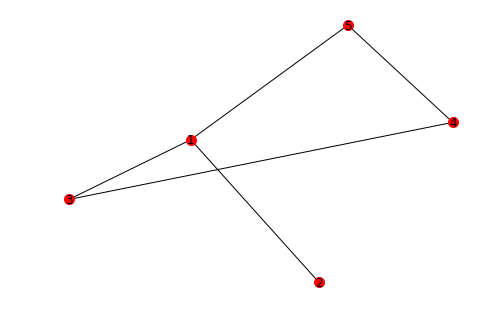

In [74]:
pos=nx.spring_layout(G,iterations=10)
nx.draw(G,pos,node_size=100,with_labels=True)
h = G.to_undirected() # при ненаправленном графе количество ребер уменьшается потому что направление туда обратно считается как 2 ребра

In [29]:
print("diameter: %d" % nx.diameter(G))

diameter: 3


Диаметр - максимальное количество шагов, максимальный путь. Размах графа. То есть за 3 вершины максимум можно дойти от одной вершины до другой

Еще одно визуальное представление сети - изобразить матрицу смежности:

In [75]:
A=nx.adjacency_matrix(G).todense() #not sparced
print(A)

[[0 1 1 0 1]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]


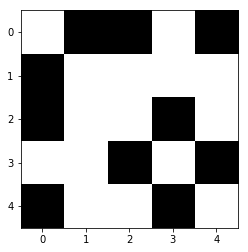

In [11]:
plt.imshow(A,cmap='binary')

# Топология сетей

Библиотека позволяет работать с различными форматами данных. Загрузим сеть из файла. 

In [33]:
G=nx.read_edgelist('ca-netscience.txt', nodetype=int)

G nodes. Then edges  = 2 * num_edges / (g*(g-1))

Плотность графа характеризуется коэффициентом плотности А — отношением числа ребер (L) в анализируемом графе 
к числу ребер в полном графе с тем же числом вершин (g). Плоность от 0 до 1. Нулевая плотность - все вершины изолированы.
Степень у простого графа - количество ребер, выходящих из вершины.
Какая средняя степень? 

Основные свойства: 1) число вершин 2) число связей 3) плотность сети

In [34]:
print("diameter: %d" % nx.diameter(G))
print("Number of nodes: %d" % nx.number_of_nodes(G))
print("Number of edges: %d" % nx.number_of_edges(G))
print("density: %s" % nx.density(G))

diameter: 17
Number of nodes: 379
Number of edges: 914
density: 0.0127598386174


Более сложные характеристики (что означает каждая из них?):

In [43]:
print("diameter: %d" % nx.diameter(G))
print("Average shortest path: %s" % nx.average_shortest_path_length(G))
print("Average clustering: %s" % nx.average_clustering(G)) #how compact is your graph. max clasterization = 1. 
#Local clasterization = num of edges between nearest nodes*2 / (степень вершины*(степень вершины -1))
print("Transitivity: %s" % nx.transitivity(G)) # насколько она построена таким образом что все узлы связаны друг с другом
# отношение количества треугольников на общее количество мотивов. Нам нужна доля, поэтому транзитивность от 0 до 1

diameter: 17
Average shortest path: 6.04186734794
Average clustering: 0.741230614293
Transitivity: 0.430575035063


Визуализация:

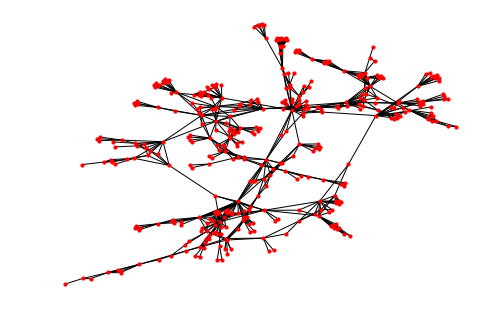

In [36]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G,pos,node_size=10,with_labels=False)

Многие характеристики сети локальны, т.е. определяются для каждой вершины графа. Для таких характеристик исследуется поведение соответствующего распределения.Построим распределение по степеням связности (degree distribution)

In [37]:
degrees = sorted([d for n, d in G.degree()], reverse=True)
print(degrees)

[34, 27, 27, 21, 19, 18, 17, 16, 15, 15, 15, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Или распределение треугольников: 

Text(0,0.5,'$\\rho$')

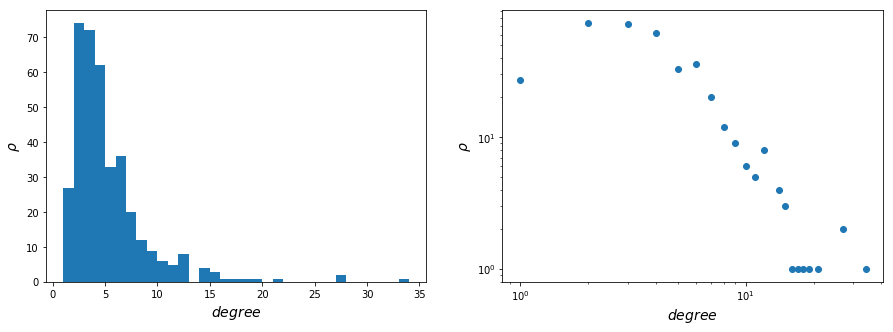

In [68]:
ro=np.bincount(degrees)
x=np.nonzero(ro)
y=ro[np.nonzero(ro)]

fig, ax = plt.subplots(nrows=1, sharey=False,ncols=2, figsize=(15, 5))

ax[0].hist(degrees, bins=max(degrees)-min(degrees))
ax[0].set_xlabel(r'$ degree$', fontsize=14)
ax[0].set_ylabel(r'$\rho$', fontsize=14)

ax[1].scatter(x,y)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$ degree$', fontsize=14)
ax[1].set_ylabel(r'$\rho$', fontsize=14)

Многие сети имеют степенное распределение степеней связности: $$\rho(d)\approx d^{-\gamma},$$ Попробуем оценить параметр распределения:

In [89]:
xlog=np.log(np.reshape(x,21)) # for the same size with array y
ylog=np.log(y)
coeff=np.polyfit(xlog[2:],ylog[2:],1) #for linear fitting
print(coeff)

[-2.18904438  6.96861607]


Показатель распределения $\gamma~\approx -2.2$, отметим, что для практически всех реальных сетей это показатель лежит в промежутке [-3,-2]!!! 

# Случайные сети

Посмотри на некоторые генераторы случайных сетей. Обычно изучение начинают с модели случайного графа Эрдеша – Реньи. Граф задается числом вершин N и вероятностью связи между любой парой вершин p.

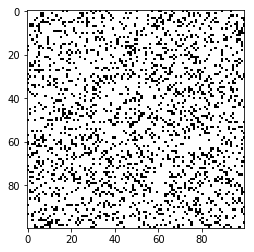

In [40]:
ER=nx.erdos_renyi_graph(100,0.2) # случайный граф Эрдеша-Реньи. 100 это число вершин. 0.2- вероятность
A=nx.adjacency_matrix(ER).todense()
plt.imshow(A,cmap='binary')

Вторая модель случайных графов - модель Барабаши-Альберта. В этом графе вершины генерируются последовательно с m связями, ребра строятся по принципу предпочтительного присоединения (более богатая ребрами вершина становится еще богаче в процессе построения графа)

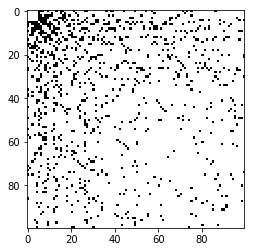

In [97]:
BA=nx.barabasi_albert_graph(100, 5) 
A=nx.adjacency_matrix(BA).todense()
plt.imshow(A,cmap='binary')

# Задание

1) Постройте распределения коэффициентов кластеризации (nx.clustering(G)) для сети ca-netscience. Что можно сказать о сети? Много ли вершин с коэффициентом кластеризации, равным 1? А 0? Что это означает?

2) Постройте распределение значений центральности (nx.betweenness_centrality(G)). Какие узлы наиболее влиятельны? 

3) Исследуйте, есть ли зависимость между значением центральности вершины и ее степени? Для этого постройте соответствующую зависимость и вычислите коэффицент корреляции Пирсона (Для вычисления корреляции используйте код ниже. 

4) Исследуем распределение степеней связности в модели Эрдеша-Реньи. Обычно рассматривается ни один случайный граф, а ансамбль графов с одними и теми же параметрами.  Рассмотрим ансамбль из 100 графов с параметрами N=1000,p=0.05. Постройте распределение в ансамбле (можно использовать plt.hist(d_all), где d_all - массив, содержащий все степени графов ансамбля). Постройте огибающую распределения, какому закону подчиняется это распределение? Определите среднее значение степени и среднеквадратичное отклонение, как эти величины связанны с N и p?

5) Исследуйте как зависит транзитивность случайного графа Эрдеша-Реньи от вероятности p. Как вы думаете почему наблюдается такая зависимость?

6) Исследуем распределение степеней связности в модели Барабаши-Альберта, выберите параметры N=1000, m=3. Постройте в двойном логарифмическом масштабе огибающую и определите коэффициент гамма степенной зависимости. 

7) Давайте сравним свойства сети ca-netscience со свойствами случайной сети той же плотности (примерно тем же количеством ребер). Выберите соответствующие параметры для моделей Эрдеша-Реньи и Барабаши-Альберта. Сравните глобальные топологические свойства и локальные (вид распределений). 


8) Напишите программу визуализации сети, в которой бы размер вершин ('node_size'),и ее цвет ('node_size') отражал значение степени, центральности. 

# Решения

1) Постройте распределения коэффициентов кластеризации (nx.clustering(G)) для сети ca-netscience. Что можно сказать о сети? Много ли вершин с коэффициентом кластеризации, равным 1? А 0? Что это означает?

In [52]:
G=nx.read_edgelist('ca-netscience.txt', nodetype=int)

(array([ 29.,  12.,  21.,  17.,  19.,  23.,  24.,   5.,  10., 219.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

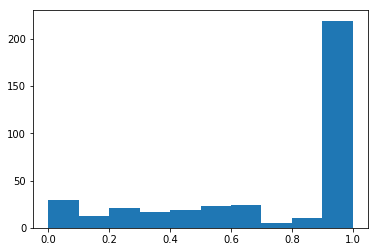

In [61]:
plt.hist(list(nx.clustering(G).values()))

2) Постройте распределение значений центральности (nx.betweenness_centrality(G)). Какие узлы наиболее влиятельны?

(array([346.,  17.,   2.,   4.,   2.,   2.,   3.,   1.,   1.,   1.]),
 array([0.        , 0.03971842, 0.07943684, 0.11915525, 0.15887367,
        0.19859209, 0.23831051, 0.27802893, 0.31774735, 0.35746576,
        0.39718418]),
 <a list of 10 Patch objects>)

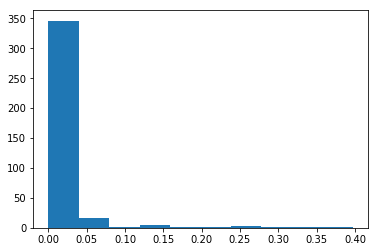

In [62]:
plt.hist(list(nx.betweenness_centrality(G).values()))

3) Исследуйте, есть ли зависимость между значением центральности вершины и ее степени? Для этого постройте соответствующую зависимость и вычислите коэффицент корреляции Пирсона (Для вычисления корреляции используйте код ниже.

In [67]:
degrees = sorted([d for n, d in G.degree()], reverse=True)
degrees = list(degrees)
centr = nx.degree_centrality(G).values()

from scipy.stats import pearsonr
corr= pearsonr(degrees, centr)
print(corr[0])

0.3764066854630992
